<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/russian_roulette_odds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulação de apostas numa Roleta Russa: análise de probabilidades e dos retornos esperados**

### **Este código pode ser usado para**:

* **Comparar estratégias de jogos de roleta**: avaliar o impacto das regras (bolsos adicionais) nos retornos médios, demonstrando como diferentes regras (roletas justas, europeias e americanas) impactam os retornos esperados.

* **Simular estratégias de apostas**: testar diferentes abordagens em cenários controlados. Demonstrar as limitações e riscos da estratégia Martingale em jogos de azar.

* **Ensino de simulações probabilísticas**: análise de resultados estatísticos, isto é, demonstrar conceitos como variabilidade e médias esperadas, avaliar médias e dispersões em experimentos simulados. Ilustrar conceitos como independência de eventos, risco e variância em experimentos probabilísticos.

* **Demonstrar os retornos esperados para 95% de confiança**: mostrar como aumentos no número de giros reduzem a incerteza (intervalos menores).

In [1]:
import random, pylab

## **Inicialização da Roleta Justa (`FairRoulette`)**

A classe `FairRoulette` simula uma roleta russa justa com 36 bolsos (*pockets*) numerados de 1 a 36, possuindo métodos para determinar a cor do bolso onde a bola caiu (preto/vermelho) e calcular retornos de apostas.
Funções principais:

* `spin`: gira a roleta e posiciona a bola em um bolso aleatório.
* `isBlack` e `isRed`: identificam a cor do bolso.
* `betBlack`, `betRed`, `betPocket`: calculam ganhos/perdas para diferentes tipos de apostas.

In [3]:
class FairRoulette():
    def __init__(self):
        """
        Inicializa a roleta justa:
        - Define os bolsos numerados de 1 a 36.
        - Inicializa a bola como `None` (não foi girada ainda).
        - Define as probabilidades para cores (preto/vermelho) como 1.0.
        - Define a probabilidade de um número específico (pocketOdds).
        """
        self.pockets = []  # Lista de bolsos disponíveis
        for i in range(1, 37):  # Números de 1 a 36
            self.pockets.append(i)
        self.ball = None  # Representa o bolso onde a bola para após o giro
        self.blackOdds, self.redOdds = 1.0, 1.0  # Probabilidades para preto e vermelho
        self.pocketOdds = len(self.pockets) - 1.0  # Probabilidade de acertar um número específico

    def spin(self):
        """
        Simula o giro da roleta:
        - Escolhe aleatoriamente um bolso onde a bola irá parar.
        """
        self.ball = random.choice(self.pockets)

    def isBlack(self):
        """
        Determina se o bolso onde a bola caiu é preto:
        - Verifica a numeração e regras específicas dos bolsos pretos.
        - Retorna True se for preto, False caso contrário.
        """
        if type(self.ball) != int:  # Verifica se a bola caiu em um bolso válido
            return False
        if ((self.ball > 0 and self.ball < 10) or  # Bolsos 1-9
            (self.ball > 18 and self.ball < 28)):  # Bolsos 19-27
            return self.ball % 2 == 0  # Números pares são pretos nesses intervalos
        else:
            return self.ball % 2 == 1  # Números ímpares são pretos fora desses intervalos

    def isRed(self):
        """
        Determina se o bolso onde a bola caiu é vermelho:
        - Retorna True se for vermelho (não preto e válido), False caso contrário.
        """
        return type(self.ball) == int and not self.isBlack()

    def betBlack(self, amt):
        """
        Calcula o retorno de uma aposta na cor preta:
        - `amt`: valor apostado.
        - Retorna um valor positivo proporcional à aposta se for preto, negativo caso contrário.
        """
        if self.isBlack():
            return amt * self.blackOdds
        else:
            return -amt

    def betRed(self, amt):
        """
        Calcula o retorno de uma aposta na cor vermelha:
        - `amt`: valor apostado.
        - Retorna um valor positivo proporcional à aposta se for vermelho, negativo caso contrário.
        """
        if self.isRed():
            return amt * self.redOdds
        else:
            return -amt

    def betPocket(self, pocket, amt):
        """
        Calcula o retorno de uma aposta em um número específico (bolso):
        - `pocket`: número do bolso apostado.
        - `amt`: valor apostado.
        - Retorna um valor positivo proporcional às probabilidades se a bola cair no número apostado, negativo caso contrário.
        """
        if str(pocket) == str(self.ball):  # Verifica se o bolso corresponde ao número apostado
            return amt * self.pocketOdds
        else:
            return -amt

    def __str__(self):
        """
        Representação textual da classe:
        - Retorna 'Fair Roulette'.
        """
        return 'Fair Roulette'

## **Simulação do Jogo de Azar: "Roleta Russa Justa"**

A função `playRoulette` é responsável por simular apostas repetidas numa roleta, acumulando os retornos médios para os diferentes tipos de apostas (vermelho, preto e um número específico).

**Parâmetros:**

* `game`: um objeto que representa o jogo de roleta, instanciado a partir da classe `FairRoulette` ou suas variações posteriores.
* `numSpins`: quantidade de giros da roleta a serem simulados.
* `toPrint`: `Flag` que indica se os resultados devem ser exibidos no console.

**Lógica Principal:**

Define um número da sorte (`luckyNumber`) para apostas específicas.
Gira a roleta `numSpins` vezes e registra o retorno de apostas em vermelho, preto e no número da sorte. Se `toPrint` for verdadeiro, exibe os retornos médios esperados. Retorna uma tupla com os retornos médios esperados para cada tipo de aposta.

In [7]:
def playRoulette(game, numSpins, toPrint=True):
    """
    Simula um número especificado de rodadas de apostas em uma roleta.

    Parâmetros:
    - game: Objeto da classe FairRoulette ou suas subclasses.
    - numSpins: Número de giros da roleta a serem simulados.
    - toPrint: Indica se os resultados devem ser impressos no console (True por padrão).

    Retorna:
    - Uma tupla contendo os retornos médios esperados para:
        1. Aposta na cor vermelha.
        2. Aposta na cor preta.
        3. Aposta em um número específico ("luckyNumber").
    """
    luckyNumber = '2'  # Número da sorte para apostas específicas
    bet = 1  # Valor fixo de cada aposta
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0  # Acumuladores para retornos

    # Realiza as rodadas de apostas
    for i in range(numSpins):
        game.spin()  # Gira a roleta
        totRed += game.betRed(bet)  # Calcula o retorno de uma aposta em vermelho
        totBlack += game.betBlack(bet)  # Calcula o retorno de uma aposta em preto
        totPocket += game.betPocket(luckyNumber, bet)  # Calcula o retorno de uma aposta no número da sorte

    # Exibe os resultados, se solicitado
    if toPrint:
        print(numSpins, 'rodadas de', game)
        print('Retorno esperado, apostando no vermelho =', str(100 * totRed / numSpins) + '%')
        print('Retorno esperado, apostando no preto =', str(100 * totBlack / numSpins) + '%')
        print('Apostas de retorno esperado', luckyNumber, '=', str(100 * totPocket / numSpins) + '%\n')

    # Retorna os retornos médios esperados
    return (totRed / numSpins, totBlack / numSpins, totPocket / numSpins)


# Configuração e execução da simulação
numSpins = 1000000  # Número de giros da roleta
game = FairRoulette()  # Instancia um jogo de roleta justa
playRoulette(game, numSpins)  # Executa a simulação


1000000 rodadas de Fair Roulette
Retorno esperado, apostando no vermelho = 11.3638%
Retorno esperado, apostando no preto = -11.3638%
Apostas de retorno esperado 2 = -0.9064%



(0.113638, -0.113638, -0.009064)

A saída acima mostra os retornos médios esperados para cada tipo de aposta após 1.000.000 de giros da roleta justa.

## **Simulação com as roletas Europeia e Americana**

A classe `EuRoulette` é uma subclasse de `FairRoulette` e representa a roleta europeia, que adiciona um bolso verde adicional (0) ao jogo, favorecendo assim ao cassino.

A classe `AmRoulette`, uma subclasse de `EuRoulette`, representa a roleta americana, que adiciona mais outro bolso verde (00), tornando o jogo ainda mais favorável ao cassino.

Ambas as classes utilizam o método `__str__` para retornar uma representação textual de suas instâncias.

A função `findPocketReturn` simula apostas repetidas em um número específico (*pocket*) para diferentes configurações de giros e experimentos. A lógica consiste em executat `numTrials` experimentos independentes, cada um com `trialSize` giros da roleta. O código coleta os retornos médios de apostas no número da sorte de cada experimento e retorna uma lista contendo os retornos de cada experimento.


In [9]:
class EuRoulette(FairRoulette):
    """
    Classe que representa a roleta europeia, uma subclass de FairRoulette.
    Adiciona um bolso extra (0) à lista de bolsos, favorecendo a casa.
    """
    def __init__(self):
        super().__init__()  # Inicializa a roleta justa
        self.pockets.append('0')  # Adiciona o bolso 0

    def __str__(self):
        """
        Representação textual da classe.
        Retorna 'European Roulette'.
        """
        return 'European Roulette'

class AmRoulette(EuRoulette):
    """
    Classe que representa a roleta americana, uma subclass de EuRoulette.
    Adiciona um bolso extra (00), tornando a roleta ainda mais favorável à casa.
    """
    def __init__(self):
        super().__init__()  # Inicializa a roleta europeia
        self.pockets.append('00')  # Adiciona o bolso 00

    def __str__(self):
        """
        Representação textual da classe.
        Retorna 'American Roulette'.
        """
        return 'American Roulette'

def findPocketReturn(game, numTrials, trialSize, toPrint):
    """
    Calcula os retornos médios de apostas em um número específico (pocket)
    para um determinado número de rodadas.

    Parâmetros:
    - game: Objeto da classe FairRoulette, EuRoulette ou AmRoulette.
    - numTrials: Número de experimentos independentes.
    - trialSize: Número de giros por experimento.
    - toPrint: Indica se os resultados intermediários devem ser impressos.

    Retorna:
    - Uma lista com os retornos para apostas em um número específico em cada experimento.
    """
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])  # Coleta o retorno de apostas no número da sorte
    return pocketReturns

# Configuração inicial da simulação
random.seed(0)  # Define uma semente para resultados reproduzíveis
numTrials = 20  # Número de experimentos independentes
resultDict = {}  # Dicionário para armazenar os resultados
games = (FairRoulette, EuRoulette, AmRoulette)  # Diferentes tipos de roleta

# Simulação
for G in games:
    resultDict[G().__str__()] = []  # Inicializa a lista de resultados para cada tipo de roleta
    for numSpins in (100, 1000, 10000, 100000):  # Diferentes tamanhos de giros
        print('\nSimulação de aposta num pocket por', numTrials,
              'tentativas de', numSpins, 'giros cada.')
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)  # Executa a simulação
        # Calcula o retorno médio e exibe
        print('Retorno esperado para', G(), '=',
              str(100 * sum(pocketReturns) / float(len(pocketReturns))) + '%')



Simulação de aposta num pocket por 20 tentativas de 100 giros cada.
Retorno esperado para Fair Roulette = 6.199999999999998%

Simulação de aposta num pocket por 20 tentativas de 1000 giros cada.
Retorno esperado para Fair Roulette = 5.840000000000001%

Simulação de aposta num pocket por 20 tentativas de 10000 giros cada.
Retorno esperado para Fair Roulette = -1.846%

Simulação de aposta num pocket por 20 tentativas de 100000 giros cada.
Retorno esperado para Fair Roulette = 0.6002000000000001%

Simulação de aposta num pocket por 20 tentativas de 100 giros cada.
Retorno esperado para European Roulette = 8.0%

Simulação de aposta num pocket por 20 tentativas de 1000 giros cada.
Retorno esperado para European Roulette = -6.039999999999998%

Simulação de aposta num pocket por 20 tentativas de 10000 giros cada.
Retorno esperado para European Roulette = -3.196%

Simulação de aposta num pocket por 20 tentativas de 100000 giros cada.
Retorno esperado para European Roulette = -2.4076%

Simulaç

## **Avaliação das médias e dispersões dos experimentos simulados**

A função `getMeanAndStd` calcula a média e o desvio padrão de uma lista de valores, fornecendo informações estatísticas para análise de resultados de simulações:

* Calcula a **média** (μ) como a soma dos valores dividida pelo tamanho da lista.
* Para cada elemento, calcula o quadrado da diferença em relação à média e soma esses valores.
* Calcula o **desvio padrão** (σ) como a raiz quadrada da soma das diferenças ao quadrado dividida pelo tamanho da lista.

**Intervalo de 95% de Confiança**

O intervalo de confiança de 95% é calculado usando o desvio padrão:
𝐼𝐶 = média ± 1.96 * desvio padrão.
Isso significa que o retorno verdadeiro estará dentro do intervalo calculado.


In [11]:
def getMeanAndStd(X):
    """
    Calcula a média e o desvio padrão de uma lista de valores.

    Parâmetros:
    - X: Lista ou array de números.

    Retorna:
    - Uma tupla contendo:
        1. A média dos valores.
        2. O desvio padrão dos valores.
    """
    mean = sum(X) / float(len(X))  # Calcula a média
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2  # Soma dos quadrados das diferenças em relação à média
    std = (tot / len(X)) ** 0.5  # Calcula o desvio padrão
    return mean, std


# Configuração inicial da simulação
random.seed(0)  # Define uma semente para resultados reproduzíveis
numTrials = 20  # Número de experimentos independentes
resultDict = {}  # Dicionário para armazenar os resultados
games = (FairRoulette, EuRoulette, AmRoulette)  # Tipos de roletas

# Simulação
for G in games:
    resultDict[G().__str__()] = []  # Inicializa os resultados para cada tipo de roleta
    for numSpins in (100, 1000, 10000):  # Diferentes tamanhos de giros
        print('\nSimulação de uma aposta num pocket por', numTrials,
              'tentativas de', numSpins, 'giros cada.')

        # Calcula os retornos para apostas em um número específico
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)  # Calcula a média e o desvio padrão
        resultDict[G().__str__()].append((numSpins, 100 * mean, 100 * std))

        # Imprime os resultados com intervalo de confiança de 95%
        print('Retorno esperado para', G(), '=',
              str(round(100 * mean, 3)) + '%, +/- ' +
              str(round(100 * 1.96 * std, 3)) +
              '% com 95% confiança')



Simulação de uma aposta num pocket por 20 tentativas de 100 giros cada.
Retorno esperado para Fair Roulette = 6.2%, +/- 152.114% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 1000 giros cada.
Retorno esperado para Fair Roulette = 5.84%, +/- 39.752% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 10000 giros cada.
Retorno esperado para Fair Roulette = -1.846%, +/- 10.556% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 100 giros cada.
Retorno esperado para European Roulette = 13.4%, +/- 145.078% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 1000 giros cada.
Retorno esperado para European Roulette = -1.72%, +/- 40.046% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 10000 giros cada.
Retorno esperado para European Roulette = -4.384%, +/- 10.952% com 95% confiança

Simulação de uma aposta num pocket por 20 tentativas de 100 giros cada.
Retorno esperad

## **Análise Comparativa: impacto das regras de diferentes roletas nos retornos esperados**

A função `plotReturn` tem por objetivo criar um gráfico de barras de erro que representa os retornos esperados em diferentes tipos de roletas com base em experimentos simulados, tendo em vista visualizar:

* O comportamento dos retornos esperados em função do número de giros.
* A comparação entre diferentes tipos de roletas.

Cada tipo de roleta (Fair, European, American) apresenta uma curva específica  para comparação visual.
* O eixo x representa o número de giros por tentativa (em escala logarítmica).
* O eixo y representa os retornos esperados em porcentagem.
* As barras de erro indicam a variabilidade dos retornos (desvios padrão).


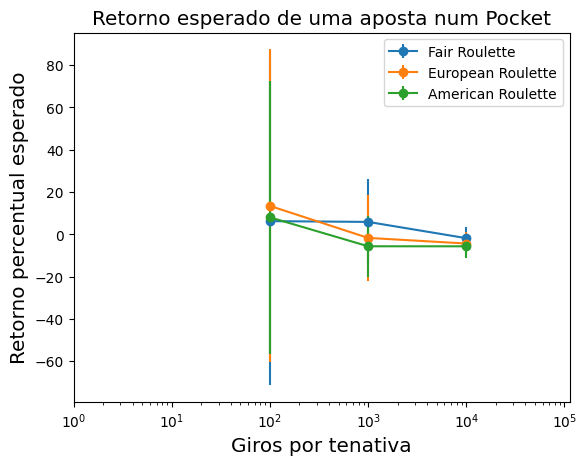

In [15]:
def plotReturn(resultDict):
    """
    Gera um gráfico que visualiza os retornos esperados em diferentes tipos de roleta,
    com base nos dados fornecidos em `resultDict`.

    Parâmetros:
    - resultDict: Dicionário onde cada chave é o nome de um tipo de roleta
      e o valor é uma lista de tuplas contendo:
        1. Número de giros (spins) por experimento.
        2. Retorno médio esperado em porcentagem.
        3. Desvio padrão em porcentagem.

    Retorno:
    - Nenhum. Exibe um gráfico diretamente.
    """
    for k in resultDict:  # Itera sobre os diferentes tipos de roleta
        xVals, yVals, eVals = [], [], []  # Listas para armazenar dados do eixo x, y e erros
        for trial in resultDict[k]:  # Para cada experimento realizado
            xVals.append(trial[0])  # Número de giros por experimento
            yVals.append(trial[1])  # Retorno médio esperado
            eVals.append(trial[2])  # Desvio padrão

        # Adiciona uma barra de erro para os dados
        pylab.errorbar(xVals, yVals, yerr=eVals, label=k, marker='o')

    # Configuração do gráfico
    pylab.legend()  # Adiciona uma legenda
    pylab.xlabel('Giros por tenativa', fontsize='x-large')  # Rótulo do eixo x
    pylab.ylabel('Retorno percentual esperado', fontsize='x-large')  # Rótulo do eixo y
    pylab.title('Retorno esperado de uma aposta num Pocket', fontsize='x-large')  # Título do gráfico
    pylab.semilogx()  # Escala logarítmica para o eixo x

    # Ajusta os limites do eixo x
    minX, maxX = pylab.xlim()
    pylab.xlim(1, maxX + 100000)  # Define o limite superior como 100.000 giros além do máximo

# Imprime a função
plotReturn(resultDict)

# Linha para depuração
# assert False

## **Histograma da distribuição dos valores individuais de um dado contínuo e das médias de 50 lançamentos**

A função `plotMeans` simula o lançamento de "dados contínuos" (ou seja, números aleatórios entre 0 e 5) e calcula as médias dos valores obtidos. Os resultados são apresentados no histograma abaixo, que exibe a distribuição das médias.

1. **Primeira simulação**:

* **Configuração**: 1 dado, 100.000 lançamentos.
O histograma mostra a distribuição dos valores individuais de um dado contínuo, a média e o desvio padrão.

2. **Segunda simulação**:

* **Configuração**: 50 dados lançados simultaneamente, 100.000 lançamentos no total. O histograma mostra a distribuição das médias de 50 lançamentos, a média e o desvio padrão.

Média de 1 dado = 2.495633755957571 Desvio Padrão = 1.4430163217178154
Média de 50 dados = 2.498897433270734 Desvio Padrão = 0.20708713919719593


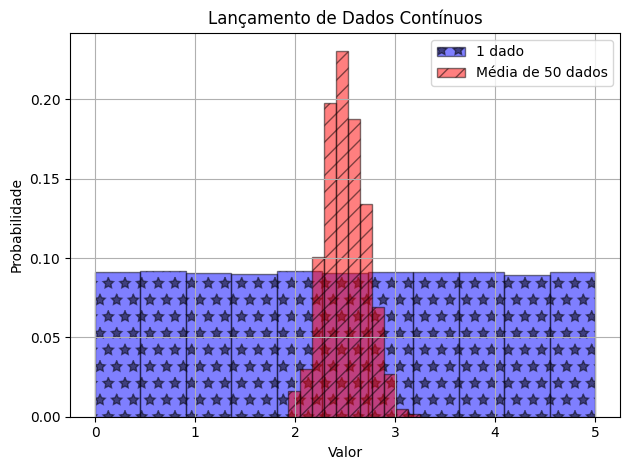

In [22]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    """
    Calcula as médias de valores obtidos ao lançar múltiplos "dados contínuos"
    várias vezes e gera um histograma dessas médias.

    Parâmetros:
    - numDice: Número de "dados contínuos" lançados em cada iteração.
    - numRolls: Número total de lançamentos realizados.
    - numBins: Número de intervalos (bins) no histograma.
    - legend: Rótulo para a legenda do histograma.
    - color: Cor usada no histograma.
    - style: Estilo do preenchimento do histograma (hatch).

    Retorna:
    - Uma tupla contendo:
        1. A média das médias calculadas.
        2. O desvio padrão das médias calculadas.
    """
    means = []  # Lista para armazenar as médias dos valores dos lançamentos

    for i in range(numRolls // numDice):  # Número de rodadas
        vals = 0
        for j in range(numDice):  # Simula o lançamento de `numDice` dados
            vals += 5 * random.random()  # Valor aleatório entre 0 e 5
        means.append(vals / float(numDice))  # Calcula a média e armazena

    # Criação do histograma
    pylab.hist(means, numBins, color=color, label=legend,
               weights=pylab.array(len(means) * [1.0]) / len(means),
               hatch=style, alpha=0.5, edgecolor='black') # adicionando transparência e bordas

    return pylab.mean(means), pylab.std(means)  # Retorna a média e o desvio padrão das médias

# Simulação e visualização
mean, std = plotMeans(1, 100000, 11, '1 dado', 'blue', '*')
print('Média de 1 dado =', mean, 'Desvio Padrão =', std)

mean, std = plotMeans(50, 100000, 11, 'Média de 50 dados', 'red', '//')
print('Média de 50 dados =', mean, 'Desvio Padrão =', std)

# Configuração do gráfico
pylab.title('Lançamento de Dados Contínuos')  # Título do gráfico em português
pylab.xlabel('Valor')  # Rótulo do eixo x em português
pylab.ylabel('Probabilidade')  # Rótulo do eixo y em português
pylab.legend()  # Adiciona a legenda
pylab.grid(True) # adicionando grid
pylab.tight_layout() # ajustando o layout para evitar sobreposição de elementos
pylab.show()

* O histograma da primeira simulação (1 dado) apresenta uma distribuição uniforme entre 0 e 5.
* O histograma da segunda simulação (50 dados) tem uma distribuição mais estreita (desvio padrão menor), centrada em 2.5.

## **Implementando a estratégia de apostas Martingale**

A função `leaveAhead` implementa uma estratégia de apostas, conhecida como *Martingale*, onde o jogador dobra a aposta após cada perda, com o objetivo de recuperar as perdas anteriores e ainda obter lucro. O objetivo é determinar a probabilidade de o jogador terminar com um saldo maior que o inicial (`stake`) após um número definido de simulações (`numTrials`).

**Lógica da Estratégia**:

1. O jogador começa com um saldo inicial (`stake`) e uma aposta inicial (`bet`), a cada rodada:
* O jogador aposta no preto (`betBlack`).
* Se perder, dobra o valor da aposta para tentar recuperar a perda anterior.
* Se ganhar, o saldo (`bankRoll`) é atualizado e a aposta é redefinida.
2. O jogador continua apostando até:
* Perder todo o dinheiro.
* Dobrar o saldo inicial (condição de sucesso).


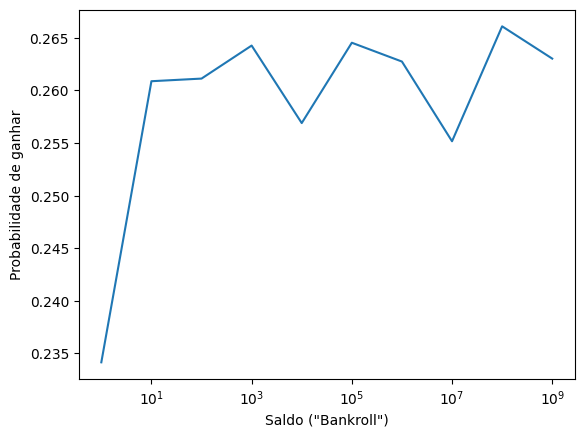

In [23]:
def leaveAhead(game, stake, bet, numTrials):
    """
    Simula uma estratégia de apostas onde o jogador tenta dobrar seu capital inicial
    (stake) e avalia a probabilidade de sair ganhando.

    Parâmetros:
    - game: Objeto do jogo de roleta (ex.: AmRoulette).
    - stake: Quantidade inicial de dinheiro do jogador.
    - bet: Valor inicial de cada aposta.
    - numTrials: Número de simulações a serem realizadas.

    Retorna:
    - A probabilidade de o jogador sair ganhando ao final das simulações.
    """
    numAhead = 0.0  # Contador de sucessos (jogador sai com lucro)

    for t in range(numTrials):  # Realiza as simulações
        bankRoll = stake  # Define o saldo inicial
        curBet = bet  # Define o valor inicial da aposta

        # Enquanto o jogador ainda tiver dinheiro e o saldo for menor que o dobro do stake
        while bankRoll > 0 and bankRoll <= 2 * stake:
            game.spin()  # Gira a roleta
            outcome = game.betBlack(curBet)  # Resultado da aposta no preto
            bankRoll += outcome  # Atualiza o saldo do jogador

            # Se perder a aposta, dobra o valor da próxima (estratégia tipo Martingale)
            if outcome < 0:
                curBet = min(2 * curBet, bankRoll)  # Garante que não aposte mais do que possui

        # Se o saldo final for maior que o stake inicial, conta como sucesso
        if bankRoll > stake:
            numAhead += 1

    return numAhead / numTrials  # Calcula a probabilidade de sucesso

# Configuração inicial da simulação
stake = 1  # Capital inicial do jogador
bet = 1  # Valor da aposta inicial
numTrials = 100000  # Número de simulações
successProb, stakes = [], []  # Listas para armazenar probabilidades e stakes

# Realiza as simulações para diferentes valores de stake
for i in range(10):
    stakes.append(10 ** i)  # Varia o stake de 1 a 10^9
    successProb.append(leaveAhead(AmRoulette(), 10 ** i, bet, numTrials))

# Gera o gráfico com os resultados
pylab.plot(stakes, successProb)  # Plota probabilidade de ganhar vs stake
pylab.xlabel('Saldo ("Bankroll")')  # Rótulo do eixo x
pylab.ylabel('Probabilidade de ganhar')  # Rótulo do eixo y
pylab.semilogx()  # Usa escala logarítmica no eixo x
pylab.show()  # Exibe o gráfico


O gráfico gerado mostra a probabilidade de sucesso (eixo y) em função do capital inicial (`stake`, eixo x) em escala logarítmica. Para apostas (`stakes`) pequenas, a probabilidade de sucesso é relativamente alta (mais próxima de 1). À medida que a aposta aumenta, a probabilidade de sucesso diminui rapidamente, pois o jogador enfrenta o risco de perder tudo antes de atingir o dobro do capital inicial.